<a href="https://colab.research.google.com/github/fauk74/Machine-Learning/blob/main/tensorflow_computervision_milestoneproject__BIG_FOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Sep 27 04:11:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-09-27 04:11:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-27 04:11:37 (67.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback , plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
import tensorflow_datasets as tfds
datasets_list=tfds.list_builders()
print("food101" in datasets_list)

True


In [ ]:
#Load in the data 
(train_data, test_data), ds_info=tfds.load(name="food101",
                                           split=["train", "validation"],
                                           shuffle_files=True,
                                           as_supervised=True, #data gest returned in format tuple(data, label)
                                           with_info=True
                                           )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete4BNK7Y/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete4BNK7Y/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
#Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
#Get the class names
class_names=ds_info.features["label"].names

In [ ]:
class_names[:20]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla']

In [ ]:
#Take one sample of our data, from train data
train_one_sample=train_data.take(1)

In [ ]:
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
for image, label in train_one_sample:
  print(f""")
  image shape : {image.shape},
  image datatype : {image.dtype},
  traget class from food 101 : {label},
  class name: {class_names[label.numpy()]}
  """)
  

)
  image shape : (512, 512, 3),
  image datatype : <dtype: 'uint8'>,
  traget class from food 101 : 5,
  class name: beet_salad
  


In [ ]:
import tensorflow as tf
tf.reduce_max(image), tf.reduce_min(image), 

(<tf.Tensor: shape=(), dtype=uint8, numpy=249>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=0>)

(-0.5, 511.5, 511.5, -0.5)

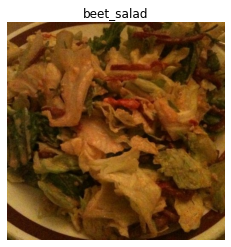

In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [ ]:
## 

# Create preprocessing functions for our data

* in uint8 datayp
* different size tensros
* not scaled

Models like data in 
* for atches,32 float
* same size 
* scaled


In [ ]:
#Make a function for preprocessing images
def preprocess_image(image, label, img_shape=224):
  """
  Converts image datatype from 'uint8' -> float 32 and reshapes 
  image to [img_shape, img_shape, color channel]
   """ 
#  x_arr=image.shape[0]
#  y_arr=image.shape[1]
#  maxdim=max(x_arr,y_arr)
#  image1=np.zeros((maxdim, maxdim,3))
#  image1[int((maxdim-y_arr)/2):maxdim,int((maxdim-x_arr)/2):maxdim,0:3]=image

  image=tf.image.resize(image, [img_shape,img_shape])


  return tf.cast(image, tf.float32), label #return (float32_image, label) tuple


In [ ]:
import numpy as np



In [ ]:
preprocess_img=preprocess_image(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape}, \nDatatype: {image.dtype}\n" )
print(f"Image after preprocessing:\n {preprocess_img[:2]}..., \nShape: {preprocess_img.shape}, \nDatatype: {preprocess_img.dtype}\n" )

Image before preprocessing:
 [[[101  58  13]
  [123  80  35]
  [125  83  35]
  ...
  [162 111  30]
  [151 100  17]
  [157 106  23]]

 [[114  71  26]
  [113  71  23]
  [105  63  15]
  ...
  [172 121  40]
  [162 111  30]
  [158 107  24]]]..., 
Shape: (512, 512, 3), 
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[113.994896  71.408165  25.168367]
  [119.04082   77.04082   27.846941]
  [114.852036  73.42347   21.362246]
  ...
  [148.58653  100.295685  20.239561]
  [166.17351  115.1735    34.1735  ]
  [157.91835  106.91835   24.744839]]

 [[124.16327   82.16327   32.96939 ]
  [129.71428   88.57653   36.862244]
  [118.331635  76.90306   23.229593]
  ...
  [163.10718  114.535706  37.178585]
  [148.81638   99.82147   20.806164]
  [151.3008   102.70389   22.49461 ]]]..., 
Shape: (224, 224, 3), 
Datatype: <dtype: 'float32'>



# Batch and prepare dataset

In [ ]:
# MAP preprocessing function to training
train_data=train_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

#Shuffle train_data and turn into batches
train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

#MAP als oon test data
test_data=test_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

# Create modelling callbacks

* Tensorboard callbacks
* Modelcheckpoint callbacks 


In [ ]:
from helper_functions import create_tensorboard_callback

#Crate Model checkpoint
checkpoint_path="model_checkpoints/cp.ckpt"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                    monitor="val_loss",
                                                    save_best_only=True,
                                                    save_weights_only=True
                                                    )



In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")


Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing





In [ ]:
#Create base model
input_shape=(224,224,3)

base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#Create functional model

inputs=layers.Input(shape=input_shape, name="input_layer")
x= base_model(inputs, training=False)
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(len(class_names))(x)
outputs=layers.Activation("softmax", dtype=tf.float32, name="softmax_float_32")(x)
model=tf.keras.Model(inputs,outputs)



16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float_32 (Activation (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
for lnum, layer in enumerate( model.layers) : # can write model.layers[1].layers as well
  print (lnum, layer.name, layer.trainable, layer.dtype, layer.compute_dtype, layer.dtype_policy)

0 input_layer True float32 float32 <Policy "float32">
1 efficientnetb0 False float32 float16 <Policy "mixed_float16">
2 global_average_pooling2d True float32 float16 <Policy "mixed_float16">
3 dense True float32 float16 <Policy "mixed_float16">
4 softmax_float_32 True float32 float32 <Policy "float32">


In [ ]:
#interesting that normalizaiton, layer 2 here is in mixed float 16, in d.bourke video policy float 32 

for lnum, layer in enumerate( base_model.layers) :
  print (lnum, layer.name, layer.trainable, layer.dtype, layer.compute_dtype, layer.dtype_policy)

0 input_1 False float32 float32 <Policy "float32">
1 rescaling False float32 float16 <Policy "mixed_float16">
2 normalization False float32 float16 <Policy "mixed_float16">
3 stem_conv_pad False float32 float16 <Policy "mixed_float16">
4 stem_conv False float32 float16 <Policy "mixed_float16">
5 stem_bn False float32 float16 <Policy "mixed_float16">
6 stem_activation False float32 float16 <Policy "mixed_float16">
7 block1a_dwconv False float32 float16 <Policy "mixed_float16">
8 block1a_bn False float32 float16 <Policy "mixed_float16">
9 block1a_activation False float32 float16 <Policy "mixed_float16">
10 block1a_se_squeeze False float32 float16 <Policy "mixed_float16">
11 block1a_se_reshape False float32 float16 <Policy "mixed_float16">
12 block1a_se_reduce False float32 float16 <Policy "mixed_float16">
13 block1a_se_expand False float32 float16 <Policy "mixed_float16">
14 block1a_se_excite False float32 float16 <Policy "mixed_float16">
15 block1a_project_conv False float32 float16 <Po

In [ ]:
mixed_precision.set_global_policy("float32")

In [ ]:
history_101_food_lasses_feature_extract=model.fit(train_data,
                                                  epochs=3,
                                                  steps_per_epoch=len(train_data),
                                                  validation_data=test_data,
                                                  validation_steps=(0.15*len(test_data)),
                                                  callbacks=[create_tensorboard_callback("training_logs",
                                                                                         experiment_name="efficientnetB0_101_all_data_feature_ext"),
                                                                                          model_checkpoint])


Saving TensorBoard log files to: training_logs/efficientnetB0_101_all_data_feature_ext/20210927-042655


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/3
2368/2368 [==============================] - 308s 110ms/step - loss: 1.8209 - accuracy: 0.5561 - val_loss: 1.2465 - val_accuracy: 0.6767
Epoch 2/3
2368/2368 [==============================] - 246s 103ms/step - loss: 1.2935 - accuracy: 0.6658 - val_loss: 1.1187 - val_accuracy: 0.6998
Epoch 3/3
2368/2368 [==============================] - 247s 103ms/step - loss: 1.1436 - accuracy: 0.7027 - val_loss: 1.0930 - val_accuracy: 0.7085


In [ ]:
results_feature_extract=model.evaluate(test_data)

790/790 [==============================] - 83s 105ms/step - loss: 1.0929 - accuracy: 0.7052


In [ ]:
for i, layer  in enumerate (model.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
#Set last 20 mlayers trainable = True

base_model.trainable=True

for layer in base_model.layers[:-20]:
  layer.trainable=False

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
fine_tune_epochs=10

history_fine_tuning         =model.fit(train_data,
                                             epochs=fine_tune_epochs,
                                             validation_data=test_data,
                                             validation_steps=int(0.25*len(test_data)),
                                             initial_epoch=history_101_food_lasses_feature_extract.epoch[-1], # start training from last epoch
                                             callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                   experiment_name="efficientnetB0_101_all_data_fine_tuning"),
                                                                                    model_checkpoint])
                                                                                  
                                             

Saving TensorBoard log files to: training_logs/efficientnetB0_101_all_data_fine_tuning/20210927-044140
Epoch 3/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


2368/2368 [==============================] - 322s 130ms/step - loss: 1.2755 - accuracy: 0.6637 - val_loss: 0.9924 - val_accuracy: 0.7286
Epoch 4/10
2368/2368 [==============================] - 301s 126ms/step - loss: 0.8988 - accuracy: 0.7530 - val_loss: 0.9403 - val_accuracy: 0.7454
Epoch 5/10
2368/2368 [==============================] - 299s 126ms/step - loss: 0.6558 - accuracy: 0.8131 - val_loss: 0.9448 - val_accuracy: 0.7448
Epoch 6/10
2368/2368 [==============================] - 299s 125ms/step - loss: 0.4832 - accuracy: 0.8562 - val_loss: 1.0261 - val_accuracy: 0.7376
Epoch 7/10
2368/2368 [==============================] - 302s 127ms/step - loss: 0.3668 - accuracy: 0.8884 - val_loss: 1.1025 - val_accuracy: 0.7303
Epoch 8/10
2368/2368 [==============================] - 303s 127ms/step - loss: 0.3007 - accuracy: 0.9055 - val_loss: 1.1979 - val_accuracy: 0.7230
Epoch 9/10
2368/2368 [==============================] - 299s 125ms/step - loss: 0.2458 - accuracy: 0.9225 - val_loss: 1.328

In [ ]:
import tensorflow as tf
from tf.keras.layers.experimental.preprocessing.TextVectorization